<a href="https://colab.research.google.com/github/GhazalehKeyvani/Data-Science-Exercises/blob/main/RS_Movie_lenz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q --upgrade tensorflow-datasets
!pip install -q scann
!pip install -q tensorflow-recommenders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 17.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.1/524.1 MB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 34.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 54.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.8/440.8 kB 16.2 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pydantic 2.2.0 requires typing-extensions>=4.6.1, but you have typing-extensions 4.5.0 which is incompatible.
pydantic-core 2.6.0 requires typing-extensions!=4.7.0,>=4.6.0, but you have typing-extensions 4.5.0 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.2/96.2 kB 1.7 MB/s eta 0:00:00


In [ ]:
!pip list
#filtering
!pip list | grep tensorflow

Package                          Version
-------------------------------- ---------------------
absl-py                          1.4.0
aiohttp                          3.8.5
aiosignal                        1.3.1
alabaster                        0.7.13
albumentations                   1.3.1
altair                           4.2.2
annotated-types                  0.5.0
anyio                            3.7.1
appdirs                          1.4.4
argon2-cffi                      23.1.0
argon2-cffi-bindings             21.2.0
array-record                     0.4.1
arviz                            0.15.1
astropy                          5.3.2
astunparse                       1.6.3
async-timeout                    4.0.3
attrs                            23.1.0
audioread                        3.0.0
autograd                         1.6.2
Babel                            2.12.1
backcall                         0.2.0
beautifulsoup4                   4.11.2
bleach                           6.0.0


In [ ]:
import tensorflow_datasets as tfds
import scann
import tensorflow_recommenders as tfrs
import tensorflow as tf
import matplotlib as plt

In [ ]:
rating_dataset ,rating_dataset_info = tfds.load(
    name= "movielens/100k-ratings",
    split="train",
    with_info=True
)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/100000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/movielens/100k-ratings/0.1.1.incomplete00Q631/movielens-train.tfrecord*...…

Dataset movielens downloaded and prepared to /root/tensorflow_datasets/movielens/100k-ratings/0.1.1. Subsequent calls will reuse this data.


In [ ]:
print(rating_dataset_info)

tfds.core.DatasetInfo(
    name='movielens',
    full_name='movielens/100k-ratings/0.1.1',
    description="""
    This dataset contains a set of movie ratings from the MovieLens website, a movie
    recommendation service. This dataset was collected and maintained by [GroupLens]
    (https://grouplens.org/), a research group at the University of Minnesota. There
    are 5 versions included: "25m", "latest-small", "100k", "1m", "20m". In all
    datasets, the movies data and ratings data are joined on "movieId". The 25m
    dataset, latest-small dataset, and 20m dataset contain only movie data and
    rating data. The 1m dataset and 100k dataset contain demographic data in
    addition to movie and rating data.
    
    - "25m": This is the latest stable version of the MovieLens dataset. It is
    recommended for research purposes.
    - "latest-small": This is a small subset of the latest version of the MovieLens
    dataset. It is changed and updated over time by GroupLens.
    - "10

In [ ]:
rating_dataset.__len__()

<tf.Tensor: shape=(), dtype=int64, numpy=100000>

In [ ]:
type(rating_dataset)

tensorflow.python.data.ops.prefetch_op._PrefetchDataset

In [ ]:
l=list(rating_dataset.as_numpy_iterator())

In [ ]:
len(l)

100000

In [ ]:
rating_dataset_head = rating_dataset.take(4)

In [ ]:
for rates in rating_dataset_head.as_numpy_iterator():
  print(rates)

{'bucketized_user_age': 45.0, 'movie_genres': array([7]), 'movie_id': b'357', 'movie_title': b"One Flew Over the Cuckoo's Nest (1975)", 'raw_user_age': 46.0, 'timestamp': 879024327, 'user_gender': True, 'user_id': b'138', 'user_occupation_label': 4, 'user_occupation_text': b'doctor', 'user_rating': 4.0, 'user_zip_code': b'53211'}
{'bucketized_user_age': 25.0, 'movie_genres': array([ 4, 14]), 'movie_id': b'709', 'movie_title': b'Strictly Ballroom (1992)', 'raw_user_age': 32.0, 'timestamp': 875654590, 'user_gender': True, 'user_id': b'92', 'user_occupation_label': 5, 'user_occupation_text': b'entertainment', 'user_rating': 2.0, 'user_zip_code': b'80525'}
{'bucketized_user_age': 18.0, 'movie_genres': array([4]), 'movie_id': b'412', 'movie_title': b'Very Brady Sequel, A (1996)', 'raw_user_age': 24.0, 'timestamp': 882075110, 'user_gender': True, 'user_id': b'301', 'user_occupation_label': 17, 'user_occupation_text': b'student', 'user_rating': 4.0, 'user_zip_code': b'55439'}
{'bucketized_use

In [ ]:
d_f = tfds.as_dataframe(rating_dataset_head,rating_dataset_info)

NameError: ignored

In [ ]:
d_f

,bucketized_user_age,movie_genres,movie_id,movie_title,raw_user_age,timestamp,user_gender,user_id,user_occupation_label,user_occupation_text,user_rating,user_zip_code
0,45.0,7 (Drama),b'357',"b""One Flew Over the Cuckoo's Nest (1975)""",46.0,879024327,True,b'138',4 (doctor/health care),b'doctor',4.0,b'53211'
1,25.0,4 (Comedy)14 (Romance),b'709',b'Strictly Ballroom (1992)',32.0,875654590,True,b'92',5 (entertainment),b'entertainment',2.0,b'80525'
2,18.0,4 (Comedy),b'412',"b'Very Brady Sequel, A (1996)'",24.0,882075110,True,b'301',17 (student),b'student',4.0,b'55439'
3,50.0,5 (Crime)7 (Drama),b'56',b'Pulp Fiction (1994)',50.0,883326919,True,b'60',4 (doctor/health care),b'healthcare',4.0,b'06472'


In [ ]:
display(d_f)

,bucketized_user_age,movie_genres,movie_id,movie_title,raw_user_age,timestamp,user_gender,user_id,user_occupation_label,user_occupation_text,user_rating,user_zip_code
0,45.0,7 (Drama),b'357',"b""One Flew Over the Cuckoo's Nest (1975)""",46.0,879024327,True,b'138',4 (doctor/health care),b'doctor',4.0,b'53211'
1,25.0,4 (Comedy)14 (Romance),b'709',b'Strictly Ballroom (1992)',32.0,875654590,True,b'92',5 (entertainment),b'entertainment',2.0,b'80525'
2,18.0,4 (Comedy),b'412',"b'Very Brady Sequel, A (1996)'",24.0,882075110,True,b'301',17 (student),b'student',4.0,b'55439'
3,50.0,5 (Crime)7 (Drama),b'56',b'Pulp Fiction (1994)',50.0,883326919,True,b'60',4 (doctor/health care),b'healthcare',4.0,b'06472'


In [ ]:
new_dataset = rating_dataset_head.map(
    lambda rating:
    {
      "user_id":rating["user_id"],
      "movie_id":rating["movie_id"],
      "movie_title":rating["movie_title"],
      "user_rating":rating["user_rating"],
      "timestamp":rating["timestamp"]

    }
)


In [ ]:
display(tfds.as_dataframe(new_dataset,rating_dataset_info))


,movie_id,movie_title,timestamp,user_id,user_rating
0,b'357',"b""One Flew Over the Cuckoo's Nest (1975)""",879024327,b'138',4.0
1,b'709',b'Strictly Ballroom (1992)',875654590,b'92',2.0
2,b'412',"b'Very Brady Sequel, A (1996)'",882075110,b'301',4.0
3,b'56',b'Pulp Fiction (1994)',883326919,b'60',4.0


In [ ]:
rating_dataset_shuffled = rating_dataset.shuffle(
    buffer_size = 100_000 ,

    seed = 111 ,

    reshuffle_each_iteration = False
)

ratings_trainset = rating_dataset_shuffled.take(80_000)
ratings_testset = rating_dataset_shuffled.skip(80_000)


#Numerical Data

In [ ]:
timestamp_normalization_layer=tf.keras.layers.Normalization(axis=None)

In [ ]:
 timestamp_data = ratings_trainset.map(
     lambda rating: rating['timestamp']
 )

In [ ]:
%%time

timestamp_normalization_layer.adapt(timestamp_data)

CPU times: user 1min 19s, sys: 4.78 s, total: 1min 24s
Wall time: 1min 22s


In [ ]:
#user_id_lookup_layer = tf.keras.layers.StringLookup(mask_token=None)

In [ ]:
for rating in ratings_trainset.take(3).as_numpy_iterator():
  print(rating['timestamp']
       ,timestamp_normalization_layer(rating['timestamp'])
  )

884196741 tf.Tensor(0.12277234, shape=(), dtype=float32)
879439232 tf.Tensor(-0.7677824, shape=(), dtype=float32)
882609056 tf.Tensor(-0.17443065, shape=(), dtype=float32)


#catigorical

In [ ]:
#user_id_lookup_layer = tf.keras.layers.StringLookup(mask_token=None)
user_id_lookup_layer = tf.keras.layers.StringLookup(mask_token=None, dtype=tf.string)
movie_id_lookup_layer = tf.keras.layers.StringLookup(mask_token=None, dtype=tf.string)


In [ ]:
user_id_data = ratings_trainset.map(
    lambda rating: rating['user_id']
)

In [ ]:
user_id_lookup_layer.adapt(user_id_data)

In [ ]:
user_id_lookup_layer.get_vocabulary()[:10]

['[UNK]', '405', '655', '13', '450', '276', '416', '234', '537', '303']

In [ ]:
user_id_embeding_dim=16


user_id_embedding = tf.keras.layers.Embedding(
    input_dim = user_id_lookup_layer.vocabulary_size(),
    output_dim = user_id_embeding_dim
    )

In [ ]:
# user_id_model = tf.keras.Sequential(
#     [
#         user_id_lookup_layer,
#         user_id_embedding
#     ]
# )
user_id_model = tf.keras.Sequential([
    user_id_lookup_layer,
    tf.keras.layers.Embedding(input_dim=user_id_lookup_layer.vocabulary_size(), output_dim=user_id_embeding_dim)
])

In [ ]:
user_id_model(['655','-1','salam','303'])

<tf.Tensor: shape=(4, 16), dtype=float32, numpy=
array([[ 6.4145923e-03,  2.8374437e-02, -3.0729437e-02, -4.5123734e-02,
         4.8539747e-02,  3.1063113e-02,  3.0678641e-02,  8.7466240e-03,
         8.7067485e-03,  4.4379804e-02,  3.7569556e-02,  2.3599733e-02,
         4.1131761e-02,  4.6433579e-02,  4.2842064e-02, -4.6449527e-03],
       [ 4.0962923e-02,  1.4363740e-02,  2.8364170e-02, -3.7665047e-02,
         8.8963881e-03, -3.7218213e-02,  3.0626323e-02, -4.3870892e-02,
         2.1625210e-02,  2.8267536e-02,  2.3841146e-02,  3.4649823e-02,
        -1.4042307e-02,  1.4817368e-02, -3.3478938e-02, -4.6205521e-03],
       [ 4.0962923e-02,  1.4363740e-02,  2.8364170e-02, -3.7665047e-02,
         8.8963881e-03, -3.7218213e-02,  3.0626323e-02, -4.3870892e-02,
         2.1625210e-02,  2.8267536e-02,  2.3841146e-02,  3.4649823e-02,
        -1.4042307e-02,  1.4817368e-02, -3.3478938e-02, -4.6205521e-03],
       [-4.4174433e-02, -1.5500627e-02,  3.8342681e-02, -7.4876770e-03,
         5.1

In [ ]:
movie_id_lookup_layer = tf.keras.layers.StringLookup(mask_token=None)
movie_id_lookup_layer.adapt(
    ratings_trainset.map(
    lambda rating: rating['user_id']
  )
)
movie_id_embedding = tf.keras.layers.Embedding(
    input_dim = movie_id_lookup_layer.vocabulary_size() ,
    output_dim = 16
)
# movie_id_model = tf.keras.Sequential(
#     movie_id_lookup_layer,
#     movie_id_embedding
# )
movie_id_model = tf.keras.Sequential([
    movie_id_lookup_layer,
    tf.keras.layers.Embedding(input_dim=movie_id_lookup_layer.vocabulary_size(), output_dim=16)
])

#Tuxtual Data

In [ ]:
movie_title_vectorization_layer=tf.keras.layers.TextVectorization()

In [ ]:
movie_title_vectorization_layer.adapt(
    ratings_trainset.map(
        lambda rating : rating['movie_title']
    )
)

In [ ]:
movie_title_vectorization_layer.get_vocabulary()[40:50]

['1998', 'first', '1977', '1971', '1983', 'love', 'monty', 'on', 'last', 'men']

In [ ]:
movie_title_vectorization_layer('first')

<tf.Tensor: shape=(1,), dtype=int64, numpy=array([41])>

In [ ]:
movie_title_embeding =tf.keras.layers.Embedding(
    input_dim = movie_title_vectorization_layer.vocabulary_size() ,
    output_dim=16
)

In [ ]:
movie_title_model = tf.keras.Sequential(
    [
        movie_title_vectorization_layer,
        movie_title_embeding
    ]
)

In [ ]:
movie_title_model(['Very Brady Sequel, A (1996)'])

<tf.Tensor: shape=(1, 5, 16), dtype=float32, numpy=
array([[[ 0.02250547,  0.04843953, -0.00933365,  0.03316602,
          0.02176898, -0.02778496, -0.0444101 ,  0.04998204,
          0.0155387 , -0.00025634,  0.03278193, -0.03478986,
          0.03236412, -0.03694259,  0.02381298, -0.00816522],
        [-0.00204549,  0.04068557,  0.04979107, -0.03022991,
         -0.01127391,  0.01961254,  0.01982966, -0.00803409,
         -0.04278076, -0.02888204,  0.00487934, -0.01882809,
         -0.02499155, -0.04385127,  0.00457732, -0.01013677],
        [ 0.03198147, -0.02154987, -0.01108073, -0.0104817 ,
          0.00649602,  0.04631807, -0.04441082, -0.03357279,
         -0.02142428,  0.02470852,  0.01912167, -0.04596021,
         -0.02090629, -0.01727307, -0.0030682 , -0.03029088],
        [ 0.00463961,  0.03450907,  0.0477397 ,  0.03854117,
          0.03151813,  0.04079745,  0.02609253, -0.04969519,
          0.01906278,  0.04834265,  0.02602399, -0.02656849,
         -0.02325645, -0.03538

In [ ]:
query_model=user_id_model
candidate_model=movie_id_model

tensorflow recomender

In [ ]:
movies_dataset,movies_dataset_info=tfds.load(
    name="movielens/100k-movies",
    split="train",
    with_info=True
)
display(
    tfds.as_dataframe(movies_dataset.take(5),movies_dataset_info)
)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/1682 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/movielens/100k-movies/0.1.1.incompleteOB11VQ/movielens-train.tfrecord*...:…

Dataset movielens downloaded and prepared to /root/tensorflow_datasets/movielens/100k-movies/0.1.1. Subsequent calls will reuse this data.


,movie_genres,movie_id,movie_title
0,4 (Comedy),b'1681',b'You So Crazy (1994)'
1,4 (Comedy)7 (Drama),b'1457',b'Love Is All There Is (1996)'
2,1 (Adventure)3 (Children),b'500',b'Fly Away Home (1996)'
3,0 (Action),b'838',b'In the Line of Duty 2 (1987)'
4,7 (Drama),b'1648',"b'Niagara, Niagara (1997)'"


In [ ]:
corpus = movies_dataset.map(
    lambda rating: rating['movie_id']
)

In [ ]:

retrieval_task_layer = tfrs.tasks.Retrieval(
    metrics = tfrs.metrics.FactorizedTopK(
        corpus.batch(128).map(candidate_model)
      )
)

In [ ]:
type(corpus)

tensorflow.python.data.ops.map_op._MapDataset

In [ ]:
type(query_model)

keras.src.engine.sequential.Sequential

In [ ]:
type(candidate_model)

keras.src.engine.sequential.Sequential

In [ ]:

class RetrievalModel(tfrs.models.Model):
  """MovieLens candidate generation model"""

  def __init__(self, query_model, candidate_model, retrieval_task_layer):
    super().__init__()
    self.query_model: tf.keras.Model = query_model
    self.candidate_model: tf.keras.Model = candidate_model
    self.retrieval_task_layer: tf.keras.layers.Layer = retrieval_task_layer

 #def compute_loss(self, features: Dict[Text, tf.Tensor], training=False):
  def compute_loss(self, features, training=False):
    query_embeddings = self.query_model(features['user_id'])
    candidate_embeddings = self.candidate_model(features["movie_id"])

    loss = self.retrieval_task_layer(
        query_embeddings,
        candidate_embeddings
        # ,compute_metrics=not training  # To speed up training
    )
    return loss

'''class RetrievalModel(tfrs.models.Model):
  def __init__(self, retrieval_layer, query_model, candidate_model):
      super().__init__()
      self.query_model = query_model
      self.candidate_model = candidate_model
      self.retrieval_model = retrieval_layer

  def compute_loss(self, features, training=False):
      query_embeddings = self.query_model(features['user_id'], features['user_id'])
      candidate_embeddings = self.candidate_model(features['movie_id'], features['movie_id'])
      loss = self.retrieval_model(query_embeddings, candidate_embeddings)
      return loss'''



"class RetrievalModel(tfrs.models.Model):\n  def __init__(self, retrieval_layer, query_model, candidate_model):\n      super().__init__()\n      self.query_model = query_model\n      self.candidate_model = candidate_model\n      self.retrieval_model = retrieval_layer\n\n  def compute_loss(self, features, training=False):\n      query_embeddings = self.query_model(features['user_id'], features['user_id'])\n      candidate_embeddings = self.candidate_model(features['movie_id'], features['movie_id'])\n      loss = self.retrieval_model(query_embeddings, candidate_embeddings)\n      return loss"

In [ ]:
movielens_retrieval_model = RetrievalModel(query_model,candidate_model,retrieval_task_layer)

In [ ]:
movielens_retrieval_model.compile(optimizer=tf.keras.optimizers.Adagrad(learning_rate=0.1))


In [ ]:
retrieval_trainset = ratings_trainset.map(
    lambda rating:{
     "user_id" : rating["user_id"],
     "movie_id" : rating["movie_id"]
     }
).shuffle(100_000).batch(8192).cache()
retrieval_testset = ratings_testset.map(
    lambda rating:{
     "user_id" : rating["user_id"],
     "movie_id" : rating["movie_id"]
     }
).batch(4096).cache()

In [ ]:
# Correct the definition of RetrievalModel
class RetrievalModel(tfrs.models.Model):
    def __init__(self, query_model, candidate_model, retrieval_task_layer):
        super().__init__()
        self.query_model = query_model
        self.candidate_model = candidate_model
        self.retrieval_task_layer = retrieval_task_layer

    def compute_loss(self, features, training=False):
        query_embeddings = self.query_model(features['user_id'])
        candidate_embeddings = self.candidate_model(features["movie_id"])
        loss = self.retrieval_task_layer(query_embeddings, candidate_embeddings)
        return loss

# Create the Retrieval model
movielens_retrieval_model = RetrievalModel(query_model, candidate_model, retrieval_task_layer)
movielens_retrieval_model.compile(optimizer=tf.keras.optimizers.Adagrad(learning_rate=0.1))

# Shuffle the ratings_trainset before creating retrieval_trainset
ratings_trainset = ratings_trainset.shuffle(buffer_size=80_000, seed=111, reshuffle_each_iteration=False)

# Prepare your data and training
retrieval_trainset = ratings_trainset.map(
    lambda rating: {
        "user_id": rating["user_id"],
        "movie_id": rating["movie_id"],
        "user_rating": rating["user_rating"]
    }
).batch(8192).cache()

retrieval_testset = ratings_testset.map(
    lambda rating: {
        "user_id": rating["user_id"],
        "movie_id": rating["movie_id"],
        "user_rating": rating["user_rating"]
    }
).batch(4096).cache()

# Train the model
history = movielens_retrieval_model.fit(
    retrieval_trainset,
    validation_data=retrieval_testset,
    validation_freq=1,
    epochs=3
)


Epoch 1/3
10/10 [==============================] - 46s 4s/step - factorized_top_k/top_1_categorical_accuracy: 0.0132 - factorized_top_k/top_5_categorical_accuracy: 0.0214 - factorized_top_k/top_10_categorical_accuracy: 0.0304 - factorized_top_k/top_50_categorical_accuracy: 0.1025 - factorized_top_k/top_100_categorical_accuracy: 0.1699 - loss: 70029.1712 - regularization_loss: 0.0000e+00 - total_loss: 70029.1712 - val_factorized_top_k/top_1_categorical_accuracy: 0.0116 - val_factorized_top_k/top_5_categorical_accuracy: 0.0295 - val_factorized_top_k/top_10_categorical_accuracy: 0.0470 - val_factorized_top_k/top_50_categorical_accuracy: 0.1658 - val_factorized_top_k/top_100_categorical_accuracy: 0.2715 - val_loss: 29095.5293 - val_regularization_loss: 0.0000e+00 - val_total_loss: 29095.5293
Epoch 2/3
10/10 [==============================] - 36s 4s/step - factorized_top_k/top_1_categorical_accuracy: 0.0047 - factorized_top_k/top_5_categorical_accuracy: 0.0233 - factorized_top_k/top_10_cate

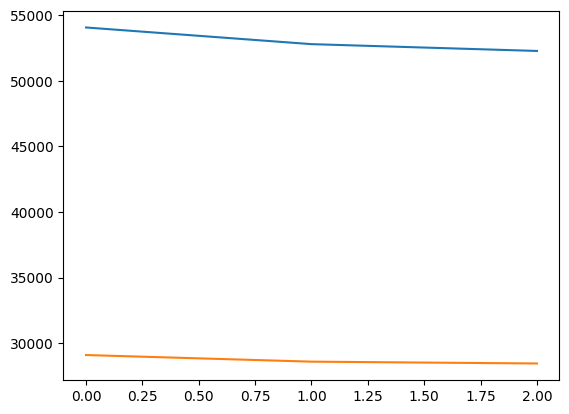

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

In [ ]:
# brute_force_layer=tfrs.layers.factorized_top_k.BruteForce(
#     movielens_retrieval_model.query_model
# )

# Create a FactorizedTopK layer

brute_force_layer = tfrs.layers.factorized_top_k.BruteForce(
    movielens_retrieval_model.query_model,k=400
)



In [ ]:
#
# Compile the brute-force retrieval layer
# brute_force_layer.compile(optimizer=tf.keras.optimizers.Adagrad(learning_rate=0.1))

# brute_force_layer.fit(retrieval_trainset)


In [ ]:
brute_force_layer.index_from_dataset(
    tf.data.Dataset.zip(
    (
        corpus.batch(100),
        corpus.batch(100).map(movielens_retrieval_model.candidate_model)
    )
  )
)
_, movie_ids = brute_force_layer(tf.constant(["42"]))
#brute_force_layer.index(corpus.batch(100).map(movielens_retrieval_model.candidate_model))

user_id='42'
print(f"Recomendations for user {user_id} using BruteForce:{movie_ids[0, :5]}")
# afinity_scores,movie_ids=brute_force_layer(
#     tf.constant([user_id])
# )

Recomendations for user 42 using BruteForce:[b'88' b'720' b'356' b'393' b'468']


In [ ]:
scann_layer=tfrs.layers.factorized_top_k.ScaNN(
    movielens_retrieval_model.query_model
)
scann_layer.index_from_dataset(
    tf.data.Dataset.zip(
    (
        corpus.batch(100),
        corpus.batch(100).map(movielens_retrieval_model.candidate_model)
    )
  )
)

user_id = '42'
afinity_scores, movie_ids = scann_layer(tf.constant([user_id]))

print(f"Recommendations for user {user_id} using BruteForce: {movie_ids[0:5]}")

Recommendations for user 42 using BruteForce: [[b'393' b'470' b'720' b'356' b'570' b'468' b'88' b'99' b'73' b'167']]


In [ ]:
class RankingModel (tfrs.models.Model):
  def __init__(self, query_model, candidate_model):
    super().__init__()
    self.query_model=query_model
    self.candidate_model=candidate_model
    self.rating_model=tf.keras.Sequential(
        [
            tf.keras.layers.Dense(256,activation='relu'),
            tf.keras.layers.Dense(64,activation='relu'),
            tf.keras.layers.Dense(1),
        ]
    )
    self.ranking_task_layer=tfrs.tasks.Ranking(
        loss=tf.keras.losses.MeanSquaredError(),
        metrics=[tf.keras.metrics.RootMeanSquaredError()]
    )
  def compute_loss(self,features,training=False):
    query_embeddings=self.query_model(features['user_id'])
    candidate_embeddings=self.candidate_model(features['movie_id'])
    rating_predictions=self.rating_model(
        tf.concat([query_embeddings,candidate_embeddings], axis=1 )
    )
    loss=self.ranking_task_layer(predictions=rating_predictions, labels=features['user_rating'])
    return loss

In [ ]:
# # Zip the index and the candidate model's embeddings
# index_candidate_embeddings = brute_force_layer.index(
#     corpus.batch(100),  # Adjust batch size as needed
#     corpus.batch(100).map(movielens_retrieval_model.candidate_model)
# )

# # Get recommendations for a specific user
# user_id = '42'
# afinity_scores, movie_ids = brute_force_layer(tf.constant([user_id]))

# print(f"Recommendations for user {user_id} using BruteForce: {movie_ids[0:5]}")

In [ ]:
movielens_ranking_model = RankingModel(query_model,candidate_model)

In [ ]:
movielens_ranking_model.compile(
    optimizer = tf.keras.optimizers.Adagrad(learning_rate=0.1)
)

In [ ]:

ranking_ratings_trainset = ratings_trainset.map(
    lambda rating: {
        "user_id": rating["user_id"],
        "movie_id": rating["movie_id"],
        "user_rating": rating["user_rating"]
    }
).shuffle(100_00).batch(8192).cache()

ranking_ratings_testset = ratings_testset.map(
    lambda rating: {
        "user_id": rating["user_id"],
        "movie_id": rating["movie_id"],
        "user_rating": rating["user_rating"]
    }
).batch(4096).cache()

In [ ]:
history=movielens_ranking_model.fit(
    ranking_ratings_trainset,
    validation_data=ranking_ratings_testset,
    validation_freq=1,
    epochs=3
)

Epoch 1/3
10/10 [==============================] - 7s 492ms/step - root_mean_squared_error: 2.6440 - loss: 6.3807 - regularization_loss: 0.0000e+00 - total_loss: 6.3807 - val_root_mean_squared_error: 1.1008 - val_loss: 1.2134 - val_regularization_loss: 0.0000e+00 - val_total_loss: 1.2134
Epoch 2/3
10/10 [==============================] - 1s 62ms/step - root_mean_squared_error: 1.1259 - loss: 1.2753 - regularization_loss: 0.0000e+00 - total_loss: 1.2753 - val_root_mean_squared_error: 1.1007 - val_loss: 1.2015 - val_regularization_loss: 0.0000e+00 - val_total_loss: 1.2015
Epoch 3/3
10/10 [==============================] - 1s 62ms/step - root_mean_squared_error: 1.0572 - loss: 1.1137 - regularization_loss: 0.0000e+00 - total_loss: 1.1137 - val_root_mean_squared_error: 1.0462 - val_loss: 1.0876 - val_regularization_loss: 0.0000e+00 - val_total_loss: 1.0876


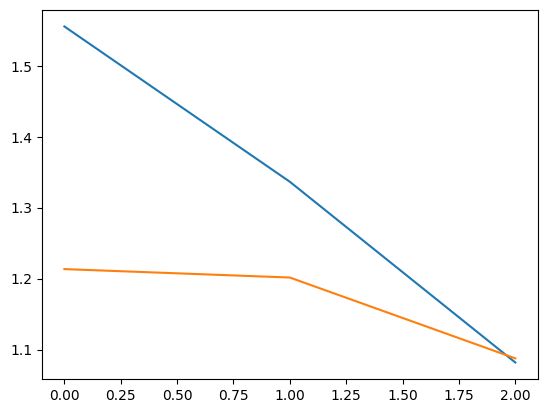

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
scann_layer.save(
    "/content/drive/MyDrive/models/retrival/test1402",
    options=tf.saved_model.SaveOptions(namespace_whitelist=["Scann"])
)

# New Section